#### Amol Kaushik
#### kaushikamol@gmail.com

# Capstone - Spam Review Detection
## Amazon Review Dataset for Cell Phones and Accessories

# Notebook 1 - EDA and Clean-Up
### Notebook: 1/3

# Table Of Contents

1. [Introduction](#Introduction)
    * Objectives of Project
    * What value does this project bring?
    * How will this project help/have an impact?
    * What are the current Spam Detection methods/models used?
2. [Breakdown of Data](#BreakdownofData)
    * Source of the Data
    * Data Dictionary
    * Quality issues with Data
    * Future Data
3. [EDA and Clean-Up](#EDA)
    * Load Data
    * Data Exploration
    * Sampled Data
    * Data Exploration/Wrangling
    * Data Distribution
    * Data Correlation
    * Drop Columns
    * Save Cleaned Dataset
    * Load Cleaned Dataset
    * Double-Check Cleaned Dataset

In [2]:
# import relevant packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [3]:
sns.set_theme() #setting the theme for the plots

# 1 - Introduction<a id = 'Introduction'></a>

### Objective of Capstone Project:
I aim to build an accurate and effective ML model to identify Spam Reviews posted on Amazon for purchased products.

### What value does this project bring:
This project aims to reduce the sale of sub-par products that get highly recommended on the basis of fake/spam reviews and ratings.

### How will this project help/have an impact:
- Help customers only purchase top quality products based on real customers/user reviews.
- Help save time, effort, and reduce money wastage on having to return or buy new products frequently due to the bad recommendations.
- Hopefully be able to integrate this model with its training with a recommender system to avoid bad products being shown to customers.
- Improve the company ratings, and image to be only associated with the best products and recommendations.

### What are the current Spam Detection methods/models used:
- Internal Amazon ML model for Spam Detection 
- Amazon Fraud Detector (AWS Service offered to external companies)

# 2 - Breakdown of Dataset

### Source of the Data:

https://www.kaggle.com/datasets/naveedhn/amazon-product-review-spam-and-non-spam

https://ieeexplore.ieee.org/abstract/document/9027828 

N. Hussain, H. Turab Mirza, I. Hussain, F. Iqbal and I. Memon, "Spam Review Detection Using the Linguistic and Spammer Behavioral Methods," in IEEE Access, vol. 8, pp. 53801-53816, 2020, doi: 10.1109/ACCESS.2020.2979226.

### Data Dictionary:
- id: ID for product
- reviewerID : ID of reviewer
- asin: Amazon Standard Identification Number (unique product identifier)
- reviewerName: Name of the Reviewer
- helpful: Votes for the extent of Helpfulness of the review [Positive, Negative]
- reviewText: The review posted by the reviewer/customer
- overall: The total number of Stars awarded to the product by the reviewer/customer (out of a max of 5)
- summary: Provides a brief summary of the Product Review
- unixReviewTime: Time product review was posted (unix time format)
- reviewTime: Time product review was posted (MM DD YYYY)
- category - Category of the product
- class: Spam identifier (0 = not spam, 1 = spam)

### Quality issues with the Data:
The data was classified by the original authors where I sourced the data. This would create some bias within the data as it now does not represent a real-world example.

### Future Data:
For any future model training and testing, I would like to use a more real-world example dataset with the spam/ham classifications not determined by individuals based on a set threshold of the helpful votes. A way to do this could be to source the Data from Amazon itself, or conduct some web-scraping for real and live data.

# 3 - EDA and Clean-up

### Loading the Data:

In [4]:
# Load the dataset from JSON format into a Pandas DataFrame
cell_data = open('Data/Cell_Phones_and_Accessories.json')

In [5]:
data = pd.read_json('Data/Cell_Phones_and_Accessories.json', lines=True)

### Data Exploration:

In [6]:
# lets explore the data
data.head()

,_id,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,category,class
0,{'$oid': '5a1321d5741a2384e802c552'},A3HVRXV0LVJN7,0110400550,BiancaNicole,"[4, 4]",Best phone case ever . Everywhere I go I get a...,5,A++++,1358035200,"01 13, 2013",Cell_Phones_and_Accessories,1
1,{'$oid': '5a1321d5741a2384e802c557'},A1BJGDS0L1IO6I,0110400550,"cf ""t""","[0, 3]",ITEM NOT SENT from Blue Top Company in Hong Ko...,1,ITEM NOT SENT!!,1359504000,"01 30, 2013",Cell_Phones_and_Accessories,0
2,{'$oid': '5a1321d5741a2384e802c550'},A1YX2RBMS1L9L,0110400550,Andrea Busch,"[0, 0]",Saw this same case at a theme park store for 2...,5,Great product,1353542400,"11 22, 2012",Cell_Phones_and_Accessories,1
3,{'$oid': '5a1321d5741a2384e802c553'},A180NNPPKWCCU0,0110400550,Aniya pennington,"[3, 3]",case fits perfectly and I always gets complime...,5,Perfect,1374105600,"07 18, 2013",Cell_Phones_and_Accessories,1
4,{'$oid': '5a1321d5741a2384e802c559'},A30P2CYOUYAJM8,0110400550,Gene,"[1, 1]",I got this for my 14 year old sister. She lov...,4,Cool purchase.,1363737600,"03 20, 2013",Cell_Phones_and_Accessories,1


In [7]:
data.tail()

,_id,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,category,class
3185840,{'$oid': '5a13226d741a2384e8376caf'},A26D35B144FHDK,B00LUFNII0,Mya Bishop,"[0, 0]",The case is nice. I have no problem with it. T...,4,Good.,1405900800,"07 21, 2014",Cell_Phones_and_Accessories,1
3185841,{'$oid': '5a13226d741a2384e8376cb0'},A13XYYFUXCC1TR,B00LUB16AG,isabel calvo,"[0, 0]",I&#8217;ve tried many armbands and I must say ...,5,It is very comfortable and simple to use,1405987200,"07 22, 2014",Cell_Phones_and_Accessories,1
3185842,{'$oid': '5a13226d741a2384e8376cb1'},AJN5FX35AU4TK,B00LV5RSLM,Gooddeals J,"[0, 0]","Good cables, both cables work and they are com...",5,Recommended,1405641600,"07 18, 2014",Cell_Phones_and_Accessories,1
3185843,{'$oid': '5a13226d741a2384e8376cb2'},A1NR37AER89LHF,B00LV5RSLM,Jay,"[0, 0]",Great products. and Great services !,5,Five Stars,1405728000,"07 19, 2014",Cell_Phones_and_Accessories,1
3185844,{'$oid': '5a13226d741a2384e8376cb3'},AUKHZBW58JEGE,B00LV5RSLM,bcai,"[0, 0]","nice, made several purchases for these cables,...",5,good,1405900800,"07 21, 2014",Cell_Phones_and_Accessories,1


In [8]:
#Checking the shape of the data
print(f'The datafram consists of {data.shape[0]} rows, and {data.shape[1]} columns')

The datafram consists of 3185845 rows, and 12 columns


In [9]:
#Checking the column names and data types for each
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3185845 entries, 0 to 3185844
Data columns (total 12 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   _id             object
 1   reviewerID      object
 2   asin            object
 3   reviewerName    object
 4   helpful         object
 5   reviewText      object
 6   overall         int64 
 7   summary         object
 8   unixReviewTime  int64 
 9   reviewTime      object
 10  category        object
 11  class           int64 
dtypes: int64(3), object(9)
memory usage: 291.7+ MB


In [10]:
data.describe()

,overall,unixReviewTime,class
count,3.185845e+06,3.185845e+06,3.185845e+06
mean,3.893530e+00,1.364454e+09,7.078141e-01
std,1.432947e+00,4.114643e+07,4.547674e-01
min,1.000000e+00,9.427968e+08,0.000000e+00
25%,3.000000e+00,1.355098e+09,0.000000e+00
50%,5.000000e+00,1.374365e+09,1.000000e+00
75%,5.000000e+00,1.391386e+09,1.000000e+00
max,5.000000e+00,1.406074e+09,1.000000e+00


As specified on the Kaggle page regarding the `class` column, it is categorical data identifying spam and not spam reviews.
It is categorised as follows:
- 0 = not spam
- 1 = spam

In [11]:
# Percentage of Spam reviews in Database
data['class'].sum()*100/len(data['class'])

70.78140964171202

As seem from the above check for total percentage of Spam reviews, the distribution of the reviews are:
   - 70% Spam Reviews
   - 30% Non-Spam Reviews (Real Reviews)

In [12]:
data.isna().sum()

_id                   0
reviewerID            0
asin                  0
reviewerName      35568
helpful               0
reviewText            0
overall               0
summary               0
unixReviewTime        0
reviewTime            0
category              0
class                 0
dtype: int64

In [13]:
data['reviewText'].duplicated().value_counts()

False    3173316
True       12529
Name: reviewText, dtype: int64

In [14]:
print(f'The total number of duplicated product review texts are: {data["reviewText"].duplicated().sum()}')

The total number of duplicated product review texts are: 12529


In [15]:
# I shall create a new column in the dataframe to classify if the `reviewText` has been duplicated or not
data['duplicateReview'] = np.where(data['reviewText'].duplicated() == True, 1, 0)

In [16]:
data['duplicateReview'].sum()

12529

In [17]:
duplicate_reviewers = data['duplicateReview'].groupby(data['reviewerName'])

In [18]:
duplicate_reviewers.head()

0          0
1          0
2          0
3          0
4          0
          ..
3185836    0
3185837    0
3185838    0
3185840    0
3185841    0
Name: duplicateReview, Length: 2337467, dtype: int64

### Create Sampled Dataset: <a id = 'CreateSampledDataset'></a>
- Making a smaller dataframe consisting of only a 5% random sample from the overall original dataframe
- This is will help reduce the computation time

In [19]:
data_sample = data.sample(frac=0.05, random_state=1)

In [20]:
data_sample

,_id,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,category,class,duplicateReview
1355781,{'$oid': '5a132218741a2384e81942dd'},A2UYXI4QS8GVLV,B007FHX9OK,NaN,"[0, 0]",Does exactly what you need it to do. Can be pu...,5,really good.,1372982400,"07 5, 2013",Cell_Phones_and_Accessories,1,0
2677724,{'$oid': '5a132256741a2384e82f0d3e'},A27LDIU05DP80D,B00D9AREZC,A. Silva,"[17, 17]",This phone absolutely rocks! Let me just say ...,5,Fantastic Phone!!... Lives Up To The Hype and ...,1387324800,"12 18, 2013",Cell_Phones_and_Accessories,1,0
1251158,{'$oid': '5a132213741a2384e81788a9'},A2IKS0J6K3O6KH,B006SMFM66,"S. Parker ""weekend baker""","[0, 0]",I bought this case because I was looking for o...,2,Kind of cheesy,1360627200,"02 12, 2013",Cell_Phones_and_Accessories,0,0
1698023,{'$oid': '5a132228741a2384e81ee74e'},A2DEIV8YFLI454,B008JE4ZBY,Jessica L Leonard,"[0, 0]",Out of all the cases that I've bought this cas...,4,Very classy and cute,1369267200,"05 23, 2013",Cell_Phones_and_Accessories,1,0
3120387,{'$oid': '5a13226a741a2384e8365977'},A2MC83S1X08Q6S,B00ICF6A5Y,Anna,"[1, 1]",This case is so pretty! It clips onto my phone...,5,Awesome,1400025600,"05 14, 2014",Cell_Phones_and_Accessories,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1394297,{'$oid': '5a13221a741a2384e819e56a'},A3SGVJT4JPGB5V,B007NFE0TM,"John P Berg ""Jack""","[0, 0]",got them for the kids and the work great. the ...,5,for the flight,1354665600,"12 5, 2012",Cell_Phones_and_Accessories,1,0
745939,{'$oid': '5a1321fa741a2384e80f2d3d'},A25QFJO8ED35AH,B004TM9646,Amazon Customer,"[0, 0]","Fit Great - great price, fast shipper.This fil...",5,Perfect Fit,1363046400,"03 12, 2013",Cell_Phones_and_Accessories,1,0
1926266,{'$oid': '5a132233741a2384e822aa0a'},AYH7RUMIKYT56,B00998HK8O,Chris Reifsteck,"[0, 0]",It works but it took a month to get here. bei...,3,battery works,1373068800,"07 6, 2013",Cell_Phones_and_Accessories,0,0
2364850,{'$oid': '5a132247741a2384e829e684'},A4RSK18IJ55PL,B00B66OJ9U,Holly West,"[0, 0]",I really like this case I got it in Turquoise ...,4,Very Cute Case!,1389830400,"01 16, 2014",Cell_Phones_and_Accessories,1,0


Looks like the new sampled Dataframe has loaded properly

In [21]:
#Saving the sampled data into a CSV file to be safe
data_sample.to_csv('Data/Cell_data_sampled.csv')

### Data Exploration/Wrangling on Sampled Dataset <a id = 'DataWrangling'></a>

**This is the starting point for the project EDA after saving the sampled dataset above. This has been done due to the loading time of the original dataset being extremely time consuming and computationally heavy**

In [22]:
#Lets load the sampled CSV back into python
data_sample = pd.read_csv('Data/Cell_data_sampled.csv')

In [23]:
#Checking to see if the CSV file has loaded properly
data_sample

,Unnamed: 0,_id,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,category,class,duplicateReview
0,1355781,{'$oid': '5a132218741a2384e81942dd'},A2UYXI4QS8GVLV,B007FHX9OK,NaN,"[0, 0]",Does exactly what you need it to do. Can be pu...,5,really good.,1372982400,"07 5, 2013",Cell_Phones_and_Accessories,1,0
1,2677724,{'$oid': '5a132256741a2384e82f0d3e'},A27LDIU05DP80D,B00D9AREZC,A. Silva,"[17, 17]",This phone absolutely rocks! Let me just say ...,5,Fantastic Phone!!... Lives Up To The Hype and ...,1387324800,"12 18, 2013",Cell_Phones_and_Accessories,1,0
2,1251158,{'$oid': '5a132213741a2384e81788a9'},A2IKS0J6K3O6KH,B006SMFM66,"S. Parker ""weekend baker""","[0, 0]",I bought this case because I was looking for o...,2,Kind of cheesy,1360627200,"02 12, 2013",Cell_Phones_and_Accessories,0,0
3,1698023,{'$oid': '5a132228741a2384e81ee74e'},A2DEIV8YFLI454,B008JE4ZBY,Jessica L Leonard,"[0, 0]",Out of all the cases that I've bought this cas...,4,Very classy and cute,1369267200,"05 23, 2013",Cell_Phones_and_Accessories,1,0
4,3120387,{'$oid': '5a13226a741a2384e8365977'},A2MC83S1X08Q6S,B00ICF6A5Y,Anna,"[1, 1]",This case is so pretty! It clips onto my phone...,5,Awesome,1400025600,"05 14, 2014",Cell_Phones_and_Accessories,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159287,1394297,{'$oid': '5a13221a741a2384e819e56a'},A3SGVJT4JPGB5V,B007NFE0TM,"John P Berg ""Jack""","[0, 0]",got them for the kids and the work great. the ...,5,for the flight,1354665600,"12 5, 2012",Cell_Phones_and_Accessories,1,0
159288,745939,{'$oid': '5a1321fa741a2384e80f2d3d'},A25QFJO8ED35AH,B004TM9646,Amazon Customer,"[0, 0]","Fit Great - great price, fast shipper.This fil...",5,Perfect Fit,1363046400,"03 12, 2013",Cell_Phones_and_Accessories,1,0
159289,1926266,{'$oid': '5a132233741a2384e822aa0a'},AYH7RUMIKYT56,B00998HK8O,Chris Reifsteck,"[0, 0]",It works but it took a month to get here. bei...,3,battery works,1373068800,"07 6, 2013",Cell_Phones_and_Accessories,0,0
159290,2364850,{'$oid': '5a132247741a2384e829e684'},A4RSK18IJ55PL,B00B66OJ9U,Holly West,"[0, 0]",I really like this case I got it in Turquoise ...,4,Very Cute Case!,1389830400,"01 16, 2014",Cell_Phones_and_Accessories,1,0


Looks like the new sampled Dataframe has loaded properly

But we will drop the `Unnamed:0` column since it is not needed

In [24]:
data_sample = data_sample.drop(data_sample.columns[0], axis=1)

In [25]:
#Checking to see if the `Unnamed:0` columns has been dropped
data_sample

,_id,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,category,class,duplicateReview
0,{'$oid': '5a132218741a2384e81942dd'},A2UYXI4QS8GVLV,B007FHX9OK,NaN,"[0, 0]",Does exactly what you need it to do. Can be pu...,5,really good.,1372982400,"07 5, 2013",Cell_Phones_and_Accessories,1,0
1,{'$oid': '5a132256741a2384e82f0d3e'},A27LDIU05DP80D,B00D9AREZC,A. Silva,"[17, 17]",This phone absolutely rocks! Let me just say ...,5,Fantastic Phone!!... Lives Up To The Hype and ...,1387324800,"12 18, 2013",Cell_Phones_and_Accessories,1,0
2,{'$oid': '5a132213741a2384e81788a9'},A2IKS0J6K3O6KH,B006SMFM66,"S. Parker ""weekend baker""","[0, 0]",I bought this case because I was looking for o...,2,Kind of cheesy,1360627200,"02 12, 2013",Cell_Phones_and_Accessories,0,0
3,{'$oid': '5a132228741a2384e81ee74e'},A2DEIV8YFLI454,B008JE4ZBY,Jessica L Leonard,"[0, 0]",Out of all the cases that I've bought this cas...,4,Very classy and cute,1369267200,"05 23, 2013",Cell_Phones_and_Accessories,1,0
4,{'$oid': '5a13226a741a2384e8365977'},A2MC83S1X08Q6S,B00ICF6A5Y,Anna,"[1, 1]",This case is so pretty! It clips onto my phone...,5,Awesome,1400025600,"05 14, 2014",Cell_Phones_and_Accessories,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
159287,{'$oid': '5a13221a741a2384e819e56a'},A3SGVJT4JPGB5V,B007NFE0TM,"John P Berg ""Jack""","[0, 0]",got them for the kids and the work great. the ...,5,for the flight,1354665600,"12 5, 2012",Cell_Phones_and_Accessories,1,0
159288,{'$oid': '5a1321fa741a2384e80f2d3d'},A25QFJO8ED35AH,B004TM9646,Amazon Customer,"[0, 0]","Fit Great - great price, fast shipper.This fil...",5,Perfect Fit,1363046400,"03 12, 2013",Cell_Phones_and_Accessories,1,0
159289,{'$oid': '5a132233741a2384e822aa0a'},AYH7RUMIKYT56,B00998HK8O,Chris Reifsteck,"[0, 0]",It works but it took a month to get here. bei...,3,battery works,1373068800,"07 6, 2013",Cell_Phones_and_Accessories,0,0
159290,{'$oid': '5a132247741a2384e829e684'},A4RSK18IJ55PL,B00B66OJ9U,Holly West,"[0, 0]",I really like this case I got it in Turquoise ...,4,Very Cute Case!,1389830400,"01 16, 2014",Cell_Phones_and_Accessories,1,0


As seen above, the `Unnamed:0` has been dropped

In [26]:
#Checking the shape of the sampled data
print(f'The dataframe consists of {data_sample.shape[0]} rows, and {data_sample.shape[1]} columns')

The dataframe consists of 159292 rows, and 13 columns


In [27]:
#Check to see that the sample dataset is 5% of the original dataset
print(f'The new sampled dataframe consists of {round(data_sample.shape[0]/data.shape[0]*100,1)}% of the original dataset')

The new sampled dataframe consists of 5.0% of the original dataset


In [28]:
# Percentage of Spam reviews in Sampled Database
data_sample['class'].sum()*100/len(data_sample['class'])

70.67649348366521

So in our sampled Data we still have a Spam to Real Review ratio of 7:3

In [29]:
data_sample.head()

,_id,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,category,class,duplicateReview
0,{'$oid': '5a132218741a2384e81942dd'},A2UYXI4QS8GVLV,B007FHX9OK,NaN,"[0, 0]",Does exactly what you need it to do. Can be pu...,5,really good.,1372982400,"07 5, 2013",Cell_Phones_and_Accessories,1,0
1,{'$oid': '5a132256741a2384e82f0d3e'},A27LDIU05DP80D,B00D9AREZC,A. Silva,"[17, 17]",This phone absolutely rocks! Let me just say ...,5,Fantastic Phone!!... Lives Up To The Hype and ...,1387324800,"12 18, 2013",Cell_Phones_and_Accessories,1,0
2,{'$oid': '5a132213741a2384e81788a9'},A2IKS0J6K3O6KH,B006SMFM66,"S. Parker ""weekend baker""","[0, 0]",I bought this case because I was looking for o...,2,Kind of cheesy,1360627200,"02 12, 2013",Cell_Phones_and_Accessories,0,0
3,{'$oid': '5a132228741a2384e81ee74e'},A2DEIV8YFLI454,B008JE4ZBY,Jessica L Leonard,"[0, 0]",Out of all the cases that I've bought this cas...,4,Very classy and cute,1369267200,"05 23, 2013",Cell_Phones_and_Accessories,1,0
4,{'$oid': '5a13226a741a2384e8365977'},A2MC83S1X08Q6S,B00ICF6A5Y,Anna,"[1, 1]",This case is so pretty! It clips onto my phone...,5,Awesome,1400025600,"05 14, 2014",Cell_Phones_and_Accessories,1,0


In [30]:
data_sample.tail()

,_id,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,category,class,duplicateReview
159287,{'$oid': '5a13221a741a2384e819e56a'},A3SGVJT4JPGB5V,B007NFE0TM,"John P Berg ""Jack""","[0, 0]",got them for the kids and the work great. the ...,5,for the flight,1354665600,"12 5, 2012",Cell_Phones_and_Accessories,1,0
159288,{'$oid': '5a1321fa741a2384e80f2d3d'},A25QFJO8ED35AH,B004TM9646,Amazon Customer,"[0, 0]","Fit Great - great price, fast shipper.This fil...",5,Perfect Fit,1363046400,"03 12, 2013",Cell_Phones_and_Accessories,1,0
159289,{'$oid': '5a132233741a2384e822aa0a'},AYH7RUMIKYT56,B00998HK8O,Chris Reifsteck,"[0, 0]",It works but it took a month to get here. bei...,3,battery works,1373068800,"07 6, 2013",Cell_Phones_and_Accessories,0,0
159290,{'$oid': '5a132247741a2384e829e684'},A4RSK18IJ55PL,B00B66OJ9U,Holly West,"[0, 0]",I really like this case I got it in Turquoise ...,4,Very Cute Case!,1389830400,"01 16, 2014",Cell_Phones_and_Accessories,1,0
159291,{'$oid': '5a13222e741a2384e8210049'},A3SPLWFBQB8K9S,B0090ZRRUW,Kara,"[0, 0]",Good case. Dropped it a few times and there wa...,4,Good case,1378771200,"09 10, 2013",Cell_Phones_and_Accessories,1,0


The `category` column will be dropped since this whole dataset only consists of product reviews from the `Cell_Phones_and_Accessories` category

In [31]:
data_sample = data_sample.drop(columns=['category'])

In [32]:
#Check to ensure category column has been dropped
data_sample

,_id,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,class,duplicateReview
0,{'$oid': '5a132218741a2384e81942dd'},A2UYXI4QS8GVLV,B007FHX9OK,NaN,"[0, 0]",Does exactly what you need it to do. Can be pu...,5,really good.,1372982400,"07 5, 2013",1,0
1,{'$oid': '5a132256741a2384e82f0d3e'},A27LDIU05DP80D,B00D9AREZC,A. Silva,"[17, 17]",This phone absolutely rocks! Let me just say ...,5,Fantastic Phone!!... Lives Up To The Hype and ...,1387324800,"12 18, 2013",1,0
2,{'$oid': '5a132213741a2384e81788a9'},A2IKS0J6K3O6KH,B006SMFM66,"S. Parker ""weekend baker""","[0, 0]",I bought this case because I was looking for o...,2,Kind of cheesy,1360627200,"02 12, 2013",0,0
3,{'$oid': '5a132228741a2384e81ee74e'},A2DEIV8YFLI454,B008JE4ZBY,Jessica L Leonard,"[0, 0]",Out of all the cases that I've bought this cas...,4,Very classy and cute,1369267200,"05 23, 2013",1,0
4,{'$oid': '5a13226a741a2384e8365977'},A2MC83S1X08Q6S,B00ICF6A5Y,Anna,"[1, 1]",This case is so pretty! It clips onto my phone...,5,Awesome,1400025600,"05 14, 2014",1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
159287,{'$oid': '5a13221a741a2384e819e56a'},A3SGVJT4JPGB5V,B007NFE0TM,"John P Berg ""Jack""","[0, 0]",got them for the kids and the work great. the ...,5,for the flight,1354665600,"12 5, 2012",1,0
159288,{'$oid': '5a1321fa741a2384e80f2d3d'},A25QFJO8ED35AH,B004TM9646,Amazon Customer,"[0, 0]","Fit Great - great price, fast shipper.This fil...",5,Perfect Fit,1363046400,"03 12, 2013",1,0
159289,{'$oid': '5a132233741a2384e822aa0a'},AYH7RUMIKYT56,B00998HK8O,Chris Reifsteck,"[0, 0]",It works but it took a month to get here. bei...,3,battery works,1373068800,"07 6, 2013",0,0
159290,{'$oid': '5a132247741a2384e829e684'},A4RSK18IJ55PL,B00B66OJ9U,Holly West,"[0, 0]",I really like this case I got it in Turquoise ...,4,Very Cute Case!,1389830400,"01 16, 2014",1,0


In [33]:
#Checking the shape of the sampled data after dropping the category columns
print(f'The datafram consists of {data_sample.shape[0]} rows, and {data_sample.shape[1]} columns')

The datafram consists of 159292 rows, and 12 columns


Great, the number of columns has been reduced to 12 from the original 13 columns. This confirms that the category column has been dropped from our sampled dataset.

In [34]:
#Checking for duplicated data
data_sample.duplicated().sum()

0

Based on the check above, we do not have any duplicated rows present in out dataset


In [35]:
#Checking for any missing data from any column
data_sample.isna().sum()

_id                   0
reviewerID            0
asin                  0
reviewerName       1779
helpful               0
reviewText            0
overall               0
summary               2
unixReviewTime        0
reviewTime            0
class                 0
duplicateReview       0
dtype: int64

In [36]:
#Checking the % of missing data from any column
data_sample.isna().sum()/data_sample.shape[0]*100

_id                0.000000
reviewerID         0.000000
asin               0.000000
reviewerName       1.116817
helpful            0.000000
reviewText         0.000000
overall            0.000000
summary            0.001256
unixReviewTime     0.000000
reviewTime         0.000000
class              0.000000
duplicateReview    0.000000
dtype: float64

Only 1% of the reviewerName entries are missing, this is not a significant amount, and I shall do some more EDA before deciding to drop these extries or not.

A possible reason for these missing values in the `reviewName` column could be due to some product reviews having been posted anonymously, or they could be spam reviewers.

Lets check the data types for each column:

In [37]:
#Checking the datatypes for each column
data_sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159292 entries, 0 to 159291
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   _id              159292 non-null  object
 1   reviewerID       159292 non-null  object
 2   asin             159292 non-null  object
 3   reviewerName     157513 non-null  object
 4   helpful          159292 non-null  object
 5   reviewText       159292 non-null  object
 6   overall          159292 non-null  int64 
 7   summary          159290 non-null  object
 8   unixReviewTime   159292 non-null  int64 
 9   reviewTime       159292 non-null  object
 10  class            159292 non-null  int64 
 11  duplicateReview  159292 non-null  int64 
dtypes: int64(4), object(8)
memory usage: 14.6+ MB


The `reviewTime` column is currently an object data type, lets convert it into a Datetime type:

In [38]:
#Lets convert the reviewTime column into a date dtype
data_sample['reviewTime'] = pd.to_datetime(data_sample['reviewTime'], errors='raise')

In [39]:
#Sanity check to make sure the reviewTime column has been converted to a date dtype
data_sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159292 entries, 0 to 159291
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   _id              159292 non-null  object        
 1   reviewerID       159292 non-null  object        
 2   asin             159292 non-null  object        
 3   reviewerName     157513 non-null  object        
 4   helpful          159292 non-null  object        
 5   reviewText       159292 non-null  object        
 6   overall          159292 non-null  int64         
 7   summary          159290 non-null  object        
 8   unixReviewTime   159292 non-null  int64         
 9   reviewTime       159292 non-null  datetime64[ns]
 10  class            159292 non-null  int64         
 11  duplicateReview  159292 non-null  int64         
dtypes: datetime64[ns](1), int64(4), object(7)
memory usage: 14.6+ MB


As seen in data types check above, the `reviewTime` column has been updated from an object type to a datetime type

Based on the dataset info above, we can see some columns have missing data:
- `reviewerName`
- `summary`

Both of these columns have less than 159292 entries, which is the total number of rows.

Lets start by checking the `reviewerName` column:

In [40]:
#Checking the total number of reviews posted by each reviewer
data_sample['reviewerName'].value_counts()

Amazon Customer       3050
Pen Name               561
Chris                  183
John                   170
David                  153
                      ... 
R.&amp; W. Schnell       1
Tawana Kerr              1
Blessed mommy of 3       1
ALBAN BEHETON            1
Holly West               1
Name: reviewerName, Length: 123127, dtype: int64

In [41]:
#Checking the total number of reviewers present in the dataset
data_sample['reviewerName'].nunique()

123127

In [42]:
#Checking the total number of rows with missing reviewerName data
data_sample['reviewerName'].isna().sum()

1779

Observations:
- There are a total of 123127 reviewers present in the dataset
- Reviewer `Amazon Customer` is the most recurring - this indicates anonymous reviews left by customers
- 1779 reviews are missing the `reviewerName` they were posted by

This is not an issue since reviews can be left anonymously.

Lets check the `reviewerID` columns to ensure all the reviews have a `reviewerID` associated to them, and how many unique `reviewerID` are present in the dataset:

In [43]:
#Checking the total number rows with a reviewerID present
len(data_sample['reviewerID']) == data_sample.shape[0]

True

In [44]:
#Checking all the reviewerID present in the dataset
data_sample['reviewerID'].value_counts()

A2NYK9KWFMJV4Y    10
A23GFTVIETX7DS    10
AWPODHOB4GFWL      9
A3LDPF5FMB782Z     9
A2LTYEYGKBYXRR     9
                  ..
A2GANOYPYFXU2C     1
A1BUPP2TAJMFBF     1
A5LWQOLFBUUC       1
A1MH8QQEN5AUAY     1
A3SPLWFBQB8K9S     1
Name: reviewerID, Length: 153299, dtype: int64

In [45]:
#Checking the total number of unique reviewerID present in the dataset
data_sample['reviewerID'].nunique()

153299

Observations:
- There are a total of 153299 `reviewerID` present in the dataset
- Reviewer ID `A2NYK9KWFMJV4Y` is the most recurring - with 10 reviews posted by this `reviewerID`

Lets check the total number of products in the dataset:

In [46]:
#Checking the total number of products present in the dataset
product_list = data_sample['asin'].value_counts()
product_list

B005SUHPO6    819
B0090YGJ4I    442
B008OHNZI0    442
B005SUHRVC    368
B008DJIIG8    366
             ... 
B0074QMP06      1
B00BDFK1RI      1
B004HO7P2G      1
B00GS7TFDM      1
B004TM9646      1
Name: asin, Length: 55622, dtype: int64

In [47]:
product_list.nunique()

151

Observations:
- There are a total of 55622 products present in the dataset
- Product `B005SUHPO6` has the most amount of reviews 
- There are a total of 151 products in the sampled dataset

Now, lets check the missing data in the `summary` column:

In [48]:
data_sample['summary'].isna().sum()

2

There is only two rows from the dataset with missing data in the `summary` column.

This row will be dropped from the dataset:

In [49]:
# Checking the total number of rows in the dataset prior to dropping the row with missing data
data_sample.shape[0]

159292

In [50]:
data_sample = data_sample[data_sample['summary'].notna()]

In [51]:
#Sanity check to ensure only onw row has been dropped
data_sample.shape[0]

159290

Great, as seen from the checks above, only the rows with missing data in the `summary` column has been dropped.

At the start of the Data Exploration, I had created a new column `duplicateReview` which identified and classified whichever reviews were duplicated in the original dataset.'

Lets check how many of those `duplicateReview` are present in the sampled dataset:

In [52]:
#Checking the total number of duplicated reviews
data_sample['duplicateReview'].sum()

630

In [53]:
#Checking the distribution of the duplicateReviews

plt.figure(figsize=(8, 5))
fig = px.histogram(data_sample, x='duplicateReview', title = 'Distribution of duplicateReviews', nbins=50)
fig.show()

<Figure size 576x360 with 0 Axes>

In [54]:
#Checking the % of Duplicated reviews out of the whole dataset
data_sample['duplicateReview'].value_counts(normalize=True)*100

0    99.604495
1     0.395505
Name: duplicateReview, dtype: float64

As seen from the the graph and check above, the `duplicateReviews` only acount for ~0.40% of reviews out of the whole dataset.

This is a very minor amount, and these duplicate reviews will be dropped

In [55]:
#Dropping all rows which have been identified with duplicate review texts
data_sample.drop(data_sample[data_sample.duplicateReview == 1].index, inplace=True)

/var/folders/q7/7mf2m9d92pg7c4ck715qqm140000gn/T/ipykernel_16050/1345015906.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [56]:
#Sanity check - 100% of the duplicateReviews should be 0
data_sample['duplicateReview'].value_counts(normalize=True)*100

0    100.0
Name: duplicateReview, dtype: float64

Now that all duplicate reviews have been dropped, we can drop the `duplicateReview` column since it does not contain any data:

In [57]:
data_sample.drop(columns='duplicateReview', inplace=True)

/var/folders/q7/7mf2m9d92pg7c4ck715qqm140000gn/T/ipykernel_16050/2478478669.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [58]:
data_sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 158660 entries, 0 to 159291
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   _id             158660 non-null  object        
 1   reviewerID      158660 non-null  object        
 2   asin            158660 non-null  object        
 3   reviewerName    156902 non-null  object        
 4   helpful         158660 non-null  object        
 5   reviewText      158660 non-null  object        
 6   overall         158660 non-null  int64         
 7   summary         158660 non-null  object        
 8   unixReviewTime  158660 non-null  int64         
 9   reviewTime      158660 non-null  datetime64[ns]
 10  class           158660 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(7)
memory usage: 14.5+ MB


Great, as seen by the check above, the `duplicateReview` columns has been successfully dropped.

Now, I will check a random sample of 10 real and 10 spam reviews to see if any sort of pattern emerges from an initial glace:

In [96]:
spam_reviews = data_sample['reviewText'][data_sample['class'] == 1]
spam_reviews.to_csv('Data/Spam_sampled.csv')
spam_reviews.sample(n= 10)

149621    I have used these on previous phones, and this...
76487     This ski case I like the others I ordered but ...
8965      I use my phone for GPS as well as for music an...
138363    I saw this case, or the rose gold version of t...
35911     I completely love it!! Is just what I expected...
79813     This is easy to put on your phone, and the ins...
43840     For the record, I have not tried to use this S...
50812     I decided to get the Infuse instead.  Dealer w...
8894      I bought a new iPhone on Saturday and needed a...
53874     I needed a car charger that worked with my LIF...
Name: reviewText, dtype: object

In [97]:
real_reviews = data_sample['reviewText'][data_sample['class'] == 0]
real_reviews.to_csv('Data/Real_sampled.csv')
real_reviews.sample(n= 10)

120563    This product is not by any means sweat resista...
110811    I use my phone a LOT. When I first got this ba...
4121      I order this a month and 9 days ago. This is c...
95726     THIS PRODUCT WILL RUIN YOUR IPHONEAttempting t...
41440     It looks very nice but wife doesnt use it beca...
14263     First off I like the headset, I like that it t...
36884     In the picture it shows the color matches the ...
123402    This case was alright as soon as I put it on m...
127247    I was so excited when I ordered my LG Electron...
140793    The case for the most part protects the phone ...
Name: reviewText, dtype: object

Based on the sampled results above, the spam reviews are sounding very positive, while the real reviews seem to be a bit more negative and neutral. This could be indicating that the spam reviews are always positive because they are trying to up-sell the products, while the real reviews are trying to paint an honest picture about the product possibly not being good quality or up to the standard that is being depicted via the spam reviews and ratings.

This should become clearer when the reviews get vectorized, and the words the highest coefficients (indicating spam) would most likely be more on the positive side, while the words with negative coefficients (indicating real) would probably be on the negative or neutral side.

Now, lets move on to check the distributions in the data.

### Data Distribution:

Lets check the distribution of the data to see if any interesting trends or observations can be found:

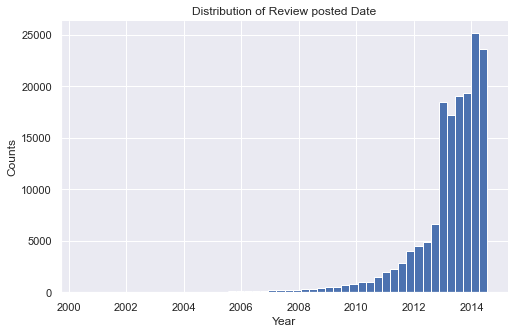

In [59]:
#Checking the distribution of the Dates when reviews were posted

plt.figure(figsize=(8, 5))

plt.hist(data_sample['reviewTime'], bins=50)
plt.title('Distribution of Review posted Date')
plt.ylabel('Counts')
plt.xlabel('Year')
sns.despine()

#Saving the plot for Capstone Presentation and Report
plt.savefig('Distribution of Review posted Date.jpeg', bbox_inches='tight')

plt.show()

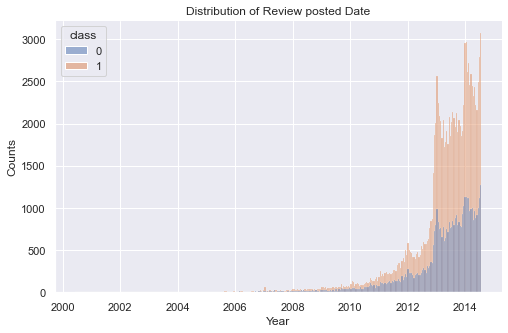

In [60]:
#Checking the distribution of the Dates when reviews were posted

plt.figure(figsize=(8, 5))

sns.histplot(data=data_sample, x='reviewTime', hue='class')
plt.title('Distribution of Review posted Date')
plt.ylabel('Counts')
plt.xlabel('Year')
sns.despine()

#Saving the plot for Capstone Presentation and Report
plt.savefig('Distribution of Review posted Date by Class.jpeg', bbox_inches='tight')

plt.show()

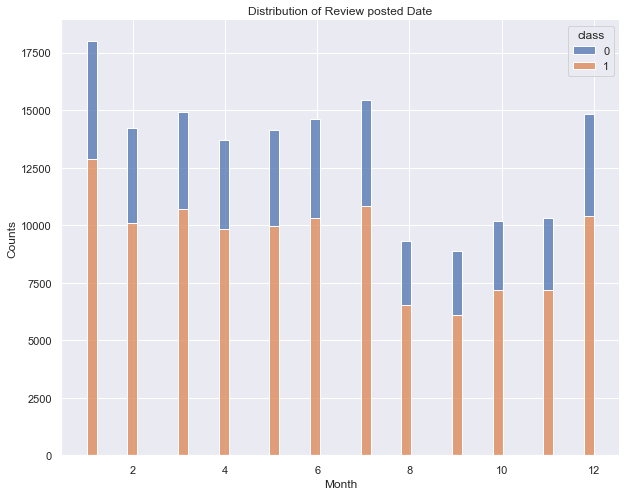

In [61]:
#Checking the distribution of the Dates when reviews were posted

plt.figure(figsize=(10, 8))

sns.histplot(data=data_sample, x=data_sample['reviewTime'].dt.month, hue='class', multiple='stack')
plt.title('Distribution of Review posted Date')
plt.ylabel('Counts')
plt.xlabel('Month')
sns.despine()

plt.show()

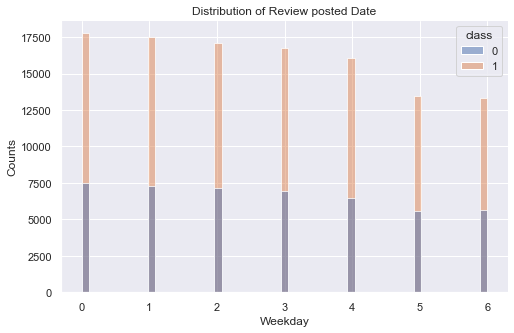

In [62]:
#Checking the distribution of the Dates when reviews were posted

plt.figure(figsize=(8, 5))

sns.histplot(data=data_sample, x=data_sample['reviewTime'].dt.weekday, hue='class')
plt.title('Distribution of Review posted Date')
plt.ylabel('Counts')
plt.xlabel('Weekday')
sns.despine()

plt.show()

The distribution splits between the spam and real reviews look to be the same at all intervals, and there is no distinct trend or seasonality to be seen.

Lets check the distribution of the spam to real reviews:

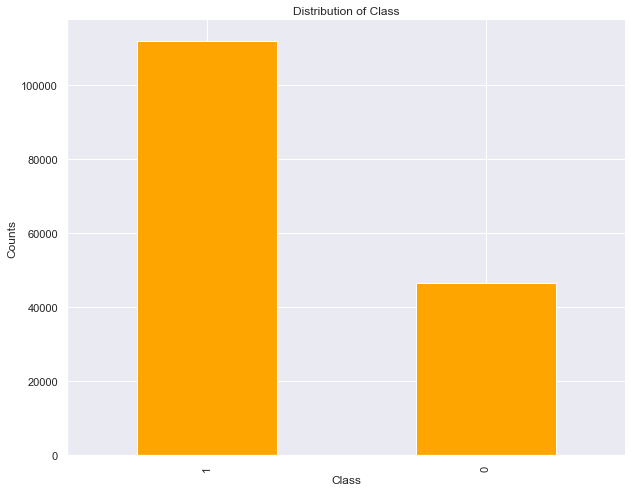

In [63]:
plt.figure(figsize=(10, 8))

data_sample['class'].value_counts().plot(kind='bar', color='orange')
plt.title('Distribution of Class')
plt.ylabel('Counts')
plt.xlabel('Class')
sns.despine()

#Saving the plot for Capstone Presentation and Report
plt.savefig('Distribution of Class.jpeg', bbox_inches='tight')

plt.show()

In [64]:
data_sample['class'].value_counts(normalize=True)

1    0.705937
0    0.294063
Name: class, dtype: float64

So, we have a bit of a class imbalance, with 70% of the data as class 1(spam), and ~30% of the data as class 0(legitimate).

This should not be an issue, since the imbalance is nothing out of the ordinary.

Lets take a look at when the spam reviews are posted vs the real reviews by date:

In [65]:
#Making a dataframe with only the spam reviews
spam_reviews = data_sample.loc[data_sample['class']==1]

In [66]:
#Making a dataframe with only the real reviews
real_reviews = data_sample.loc[data_sample['class']==0]

Lets check the distribution of the spam reviews by posted date:

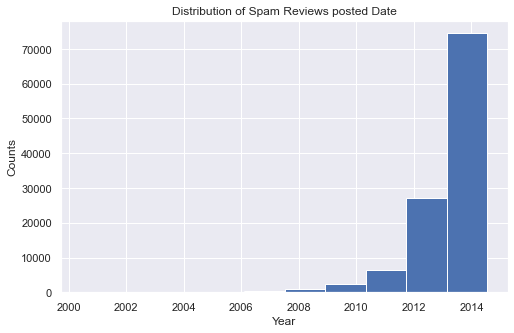

In [67]:
#Posted Year
plt.figure(figsize=(8, 5))
plt.hist(spam_reviews['reviewTime'])
plt.title('Distribution of Spam Reviews posted Date')
plt.ylabel('Counts')
plt.xlabel('Year')
plt.show()

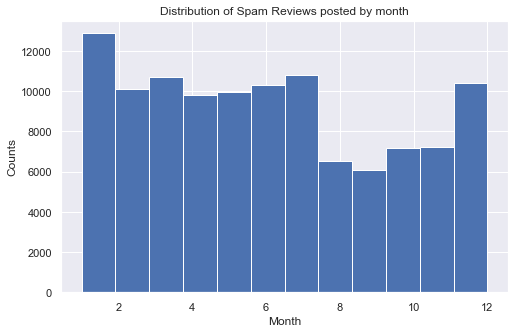

In [68]:
#Posted Month
plt.figure(figsize=(8, 5))
plt.hist(spam_reviews['reviewTime'].dt.month, bins=12)
plt.title('Distribution of Spam Reviews posted by month')
plt.ylabel('Counts')
plt.xlabel('Month')
plt.show()
plt.show()

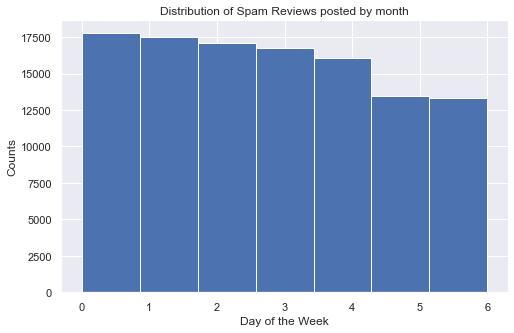

In [69]:
#Posted Weekday
#Weekdays are Monday(0) - Sunday(6)
plt.figure(figsize=(8, 5))
plt.hist(spam_reviews['reviewTime'].dt.weekday, bins=7)
plt.title('Distribution of Spam Reviews posted by month')
plt.ylabel('Counts')
plt.xlabel('Day of the Week')
plt.show()
plt.show()

There does not seem to be any sort of seasonality within the spam review posting dates.

If we had the time the reviews were posted, we could check for any seasonality in the review posts. This would help identify if spam reviews are posted regularly at any specific time during the day.

Lets check the distribution of the real reviews by posted date:

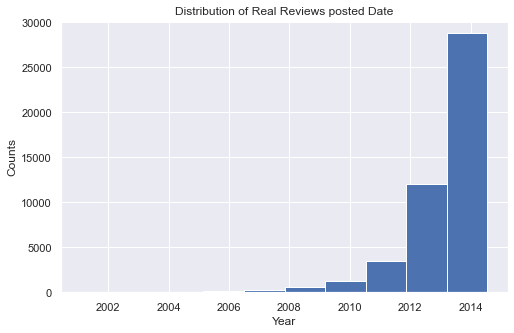

In [70]:
#Posted Year
plt.figure(figsize=(8, 5))
plt.hist(real_reviews['reviewTime'])
plt.title('Distribution of Real Reviews posted Date')
plt.ylabel('Counts')
plt.xlabel('Year')
plt.show()

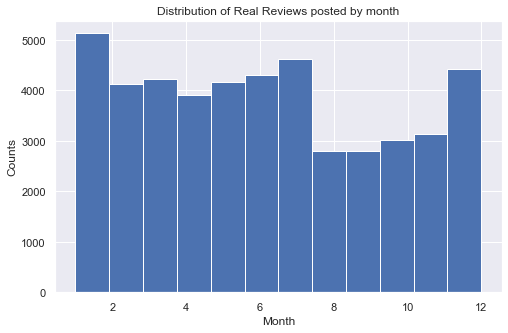

In [71]:
#Posted Month
plt.figure(figsize=(8, 5))
plt.hist(real_reviews['reviewTime'].dt.month, bins=12)
plt.title('Distribution of Real Reviews posted by month')
plt.ylabel('Counts')
plt.xlabel('Month')
plt.show()
plt.show()

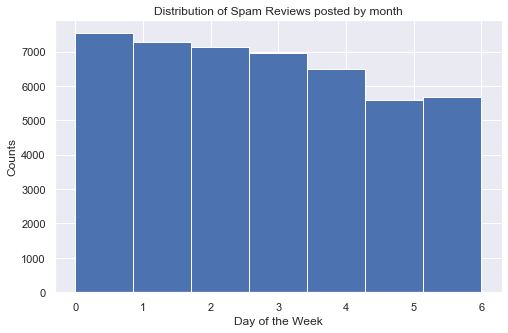

In [72]:
#Posted Weekday
#Weekdays are Monday(0) - Sunday(6)
plt.figure(figsize=(8, 5))
plt.hist(real_reviews['reviewTime'].dt.weekday, bins=7)
plt.title('Distribution of Spam Reviews posted by month')
plt.ylabel('Counts')
plt.xlabel('Day of the Week')
plt.show()
plt.show()

There does not seem to be any sort of seasonality within the real review posting dates.

For this reason the `reviewTime` column will be dropped. No clear connection/pattern can be seen or made between the dates and the spam/real reviews.

### Data Correlation

Lets take a look at the correlations for the `class` columns with the rest of the features:

In [73]:
data_sample.corr()['class']

overall           0.908369
unixReviewTime    0.032833
class             1.000000
Name: class, dtype: float64

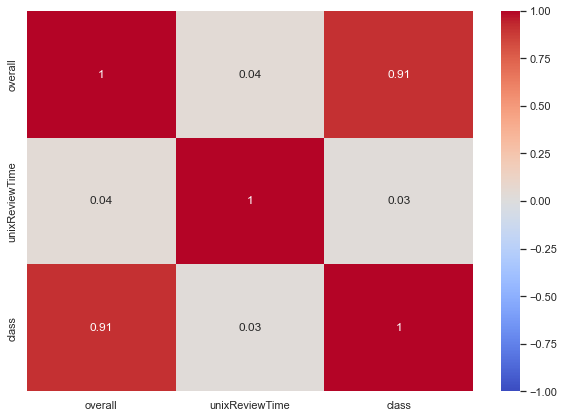

In [74]:
#lets plot a heatmap and take a look at the correlations
plt.figure(figsize=(10,7))
sns.heatmap(data_sample.corr().round(2), annot=True, vmin=-1, vmax=1, cmap="coolwarm")

#Saving the plot for Capstone Presentation and Report
plt.savefig('Correlation Heatmap.jpeg', bbox_inches='tight')

plt.show()

Since most of the features are objects and non-numeric, the heatmap is relatively small. From the heatmap it is evident that the `class` and `overall` columns are highly correlated. They are almost perfectly correlated with a correlation coefficient of 0.91. While `unixReviewTime` has a very low correlation with the `overall`, and `class` columns.

Lets take a look at the distribution of the `overall` column and break it down by the `class`:

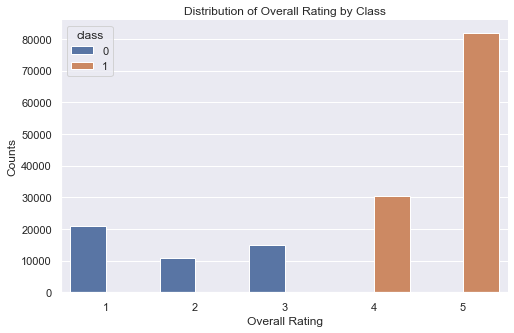

In [75]:
plt.figure(figsize=(8, 5))

sns.countplot(data=data_sample, x='overall', hue='class')
plt.title('Distribution of Overall Rating by Class')
plt.ylabel('Counts')
plt.xlabel('Overall Rating')
sns.despine()

#Saving the plot for Capstone Presentation and Report
plt.savefig('Distribution of Overall Rating by Class.jpeg', bbox_inches='tight')

plt.show()

As seen from the plot above, there is a very clear correlation between the `overall` rating, and reviews. It is evident that the reviews with an `overall` rating of 4 and higher are spam reviews, while anything rated 3 and below are real reviews.

Lets also perform a Chi-squared test to see if there is any satistical significance between the `class` and `overall` columns: 

In [76]:
#imported libraries
from scipy import stats
from scipy.stats import norm
from scipy.stats import chi2_contingency

In [77]:
class_overall = pd.crosstab(data_sample['class'], data_sample['overall'])
class_overall

overall,1,2,3,4,5
class,,,,,
0,20921,10880,14855,0,0
1,0,0,0,30279,81725


In [78]:
stats.chisquare(class_overall)

Power_divergenceResult(statistic=array([20921., 10880., 14855., 30279., 81725.]), pvalue=array([0., 0., 0., 0., 0.]))

In [79]:
stats.chi2_contingency(class_overall)

(158660.0,
 0.0,
 4,
 array([[ 6152.0873314 ,  3199.40300013,  4368.30253372,  8903.92678684,
         24032.28034791],
        [14768.9126686 ,  7680.59699987, 10486.69746628, 21375.07321316,
         57692.71965209]]))

As seen from the results of the Chi squared test, the p-value is less than 0.05, meaning we can reject the null hypothesis that there is no correlation between the `class` and `overall` columns.

Given the high correlation between the `class` and `overall` columns, and the clear distinction between the spam and real reviews purly based on the `overall` rating, this column will be dropped. This does not represent a real-world scenario, and such a clear distinction between the review `class` purly based on the `overall` rating will greatly influence the accuracy of the spam detection model.

### Drop Columns

After the initial EDA, the following columns will be dropped as they do not provide any insignts towards helping detect if any product review is spam or not:
- `_id` - this is a type of computer generated product ID - the products themselves are real so this does not help  identify if the reviews for it are spam or not
- `reviewerID` - once again a computer generated ID - not indicative of a spam or real review
- `asin` - Amazon Standard Identifcation Number is a real product ID - not related to the spam or real reviews
- `reviewerName` - since the reviewerName can be in any format or even missing/anonymous this feature might cause the spam review detection model to skew due to certain reviewerNames being weird/childish/out of the ordinary, indicating a fake/spam reviewer while being a completely legitmate reviewer
- `overall` - there is an extremely high correlation with our target column(`class`), and this will cause the model to ignore all other features, and purly make a prediction solely based on the `overall` rating
- `unixReviewTime` - this is duplicated information since we already have the `reviewTime` column in a proper datetime format
- `reviewTime` - there is no clear connection/pattern that can be seen/made between the dates and the spam/real

In [80]:
#Checking the total number of columns in the dataset
data_sample.shape[1]

11

Currently there are 11 columns present in the dataset. I shall be dropping 7 columns. After which there should only be 4 columns remaining.

Lets drop the columns now:

In [81]:
data_sample.drop(columns=['_id', 'reviewerID', 'asin', 'reviewerName','overall', 'unixReviewTime', 'reviewTime'], inplace=True)

/var/folders/q7/7mf2m9d92pg7c4ck715qqm140000gn/T/ipykernel_16050/3202235393.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [82]:
#Checking the total number of rows and columns in the dataset after dropping the columns
print(f'The datafram consists of {data_sample.shape[0]} rows, and {data_sample.shape[1]} columns')

The datafram consists of 158660 rows, and 4 columns


In [83]:
data_sample.head()

,helpful,reviewText,summary,class
0,"[0, 0]",Does exactly what you need it to do. Can be pu...,really good.,1
1,"[17, 17]",This phone absolutely rocks! Let me just say ...,Fantastic Phone!!... Lives Up To The Hype and ...,1
2,"[0, 0]",I bought this case because I was looking for o...,Kind of cheesy,0
3,"[0, 0]",Out of all the cases that I've bought this cas...,Very classy and cute,1
4,"[1, 1]",This case is so pretty! It clips onto my phone...,Awesome,1


Brilliant, we are now only left with the 4 columns that will be most useful for the spam dection model.

I shall save a new CSV file with the cleaned data before proceeding with the data transformation and modelling:

### Save Cleaned Dataset

In [84]:
data_sample.to_csv('Data/Cell_data_sampled_clean.csv', index=False)

### Load Cleaned Dataset

As a sanity check, I shall load the clean dataset and check the number of rows and columns to ensure that it was saved properly and that everything is in order:

In [85]:
data_sample_clean = pd.read_csv('Data/Cell_data_sampled_clean.csv')

### Double-Check Cleaned Dataset

In [86]:
#Checking the total number of rows and columns in the cleaned dataset
print(f'The datafram consists of {data_sample_clean.shape[0]} rows, and {data_sample_clean.shape[1]} columns')

The datafram consists of 158660 rows, and 4 columns


In [87]:
data_sample_clean

,helpful,reviewText,summary,class
0,"[0, 0]",Does exactly what you need it to do. Can be pu...,really good.,1
1,"[17, 17]",This phone absolutely rocks! Let me just say ...,Fantastic Phone!!... Lives Up To The Hype and ...,1
2,"[0, 0]",I bought this case because I was looking for o...,Kind of cheesy,0
3,"[0, 0]",Out of all the cases that I've bought this cas...,Very classy and cute,1
4,"[1, 1]",This case is so pretty! It clips onto my phone...,Awesome,1
...,...,...,...,...
158655,"[0, 0]",got them for the kids and the work great. the ...,for the flight,1
158656,"[0, 0]","Fit Great - great price, fast shipper.This fil...",Perfect Fit,1
158657,"[0, 0]",It works but it took a month to get here. bei...,battery works,0
158658,"[0, 0]",I really like this case I got it in Turquoise ...,Very Cute Case!,1


In [88]:
#Check comparing the shapes of the current sampled dataset and the newly saved clean version
if data_sample.shape == data_sample_clean.shape:
    print('The shaped for both datasets are matching...YAY!')
else:
    print('The shaped for both datasets are not matching...SOMETHING IS WRONG...')

The shaped for both datasets are matching...YAY!


Brilliant! The clean dataset was saved properly without any issues or missing data.
The number of rows and columns between the current dataset and the newly saved clean version are also matching!